In [1]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


# **KMeans**

In [2]:
import pandas as pd
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [3]:
dataset = dataset.dropna(subset=['bmi'])

In [4]:
dataset.shape

(4909, 12)

<Axes: xlabel='age', ylabel='avg_glucose_level'>

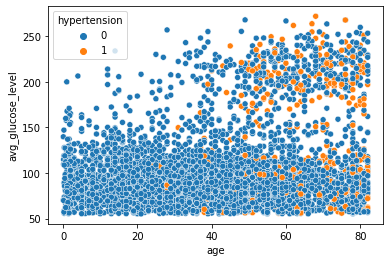

In [5]:
import seaborn as sns

sns.scatterplot(data = dataset, x = 'age', y = 'avg_glucose_level', hue = 'hypertension')


In [6]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset[['age', 'avg_glucose_level']], dataset[['bmi']], test_size=0.33, random_state=0)

In [7]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='age', ylabel='avg_glucose_level'>

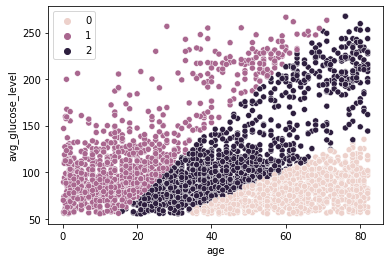

In [9]:
sns.scatterplot(data = X_train, x = 'age', y = 'avg_glucose_level', hue = kmeans.labels_)

<Axes: ylabel='bmi'>

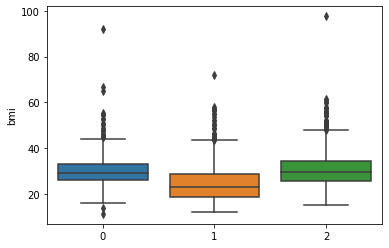

In [10]:
sns.boxplot(x = kmeans.labels_, y = y_train['bmi'])

In [11]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.553153558375945

In [12]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='age', ylabel='avg_glucose_level'>

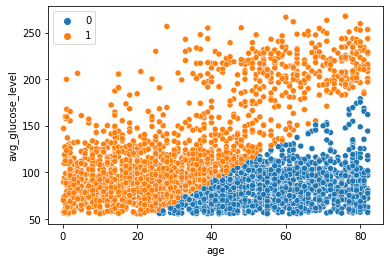

In [13]:
sns.scatterplot(data = X_train, x = 'age', y = 'avg_glucose_level', hue = fits[0].labels_)

<Axes: xlabel='age', ylabel='avg_glucose_level'>

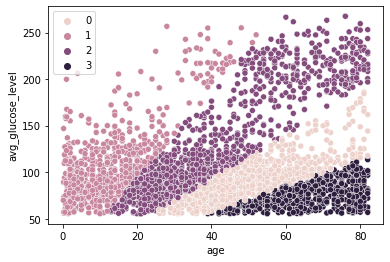

In [14]:
sns.scatterplot(data = X_train, x = 'age', y = 'avg_glucose_level', hue = fits[2].labels_)

<Axes: xlabel='age', ylabel='avg_glucose_level'>

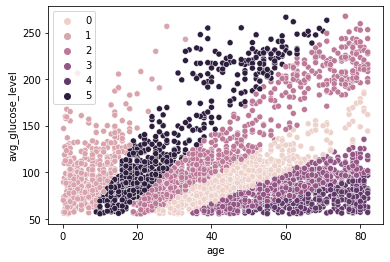

In [15]:
sns.scatterplot(data = X_train, x = 'age', y = 'avg_glucose_level', hue = fits[4].labels_)

<Axes: >

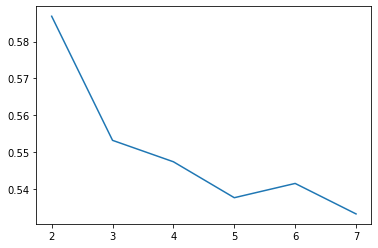

In [16]:
sns.lineplot(x = K, y = score)

<Axes: ylabel='bmi'>

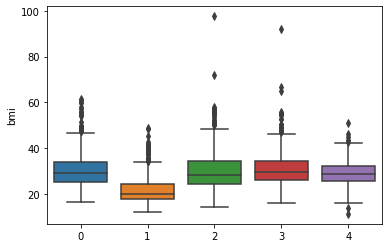

In [17]:
sns.boxplot(x = fits[3].labels_, y = y_train['bmi'])

# **Hierarchical**

In [18]:
percent_missing =round(100*(dataset.isnull().sum())/len(dataset),2)
percent_missing

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

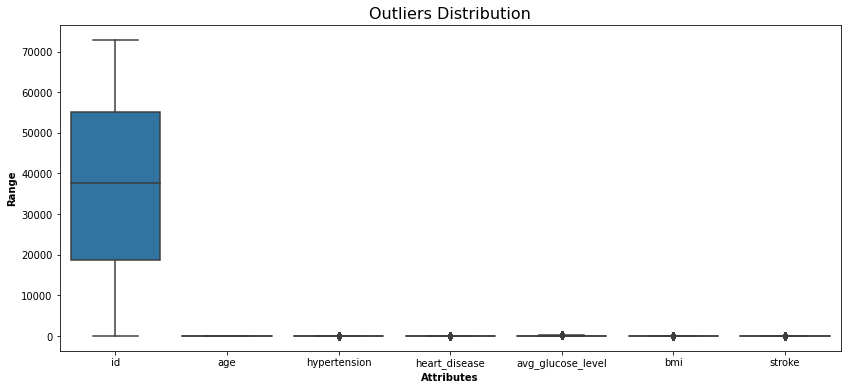

In [19]:
import matplotlib.pyplot as plt
def show_boxplot(df):
  plt.rcParams['figure.figsize'] = [14,6]
  sns.boxplot(data = df, orient="v")
  plt.title("Outliers Distribution", fontsize = 16)
  plt.ylabel("Range", fontweight = 'bold')
  plt.xlabel("Attributes", fontweight = 'bold')
   
show_boxplot(dataset)

In [20]:
dataset=dataset.drop(['gender','ever_married','work_type','Residence_type','smoking_status'], axis=1)

In [21]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

scaled_data= data_scaler.fit_transform(dataset)
scaled_data.shape

(4909, 7)

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

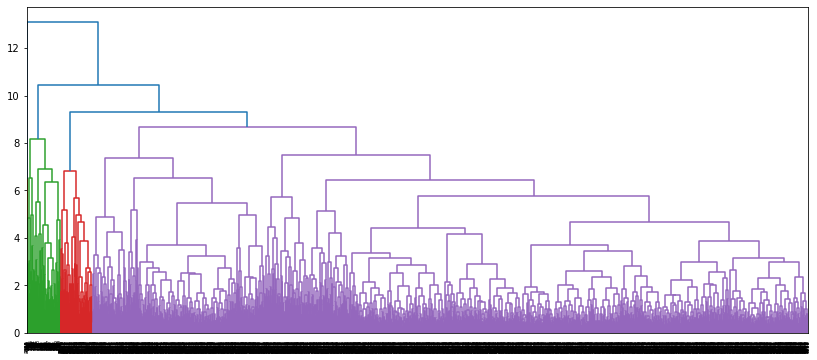

In [23]:
dendrogram(complete_clustering)
plt.show()

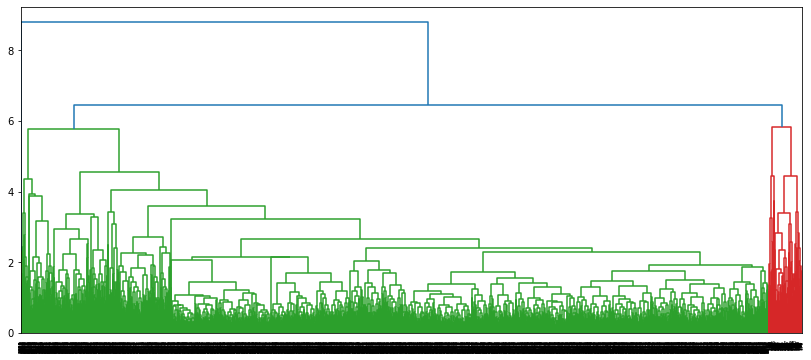

In [24]:
dendrogram(average_clustering)
plt.show()

# DBScan

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

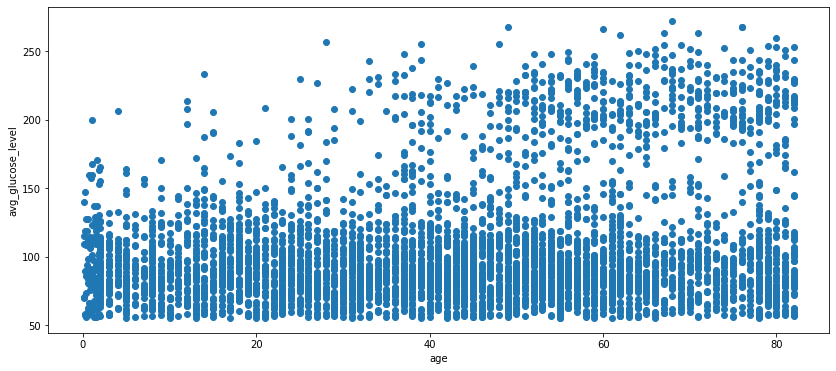

In [26]:
x = dataset['age']
y = dataset['avg_glucose_level']

plt.scatter(x,y)
plt.xlabel("age")
plt.ylabel("avg_glucose_level")
plt.show()

In [27]:
dataset = dataset[["age", "avg_glucose_level"]]
dataset = dataset.to_numpy().astype("float32", copy = False)

In [28]:
stscaler = StandardScaler().fit(dataset)
dataset = stscaler.transform(dataset)


In [29]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(dataset)


In [30]:
import numpy as np
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [31]:
dbsc = DBSCAN(eps=0.3, min_samples=10).fit(dataset)
labels = dbsc.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 1
